# Naive Bayes Classifier


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv("D:/Desktop/Assignments/Assignemnt12/SalaryData_Train(1).csv")
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Checking Some Statistics Parameter for numberical Columns

df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


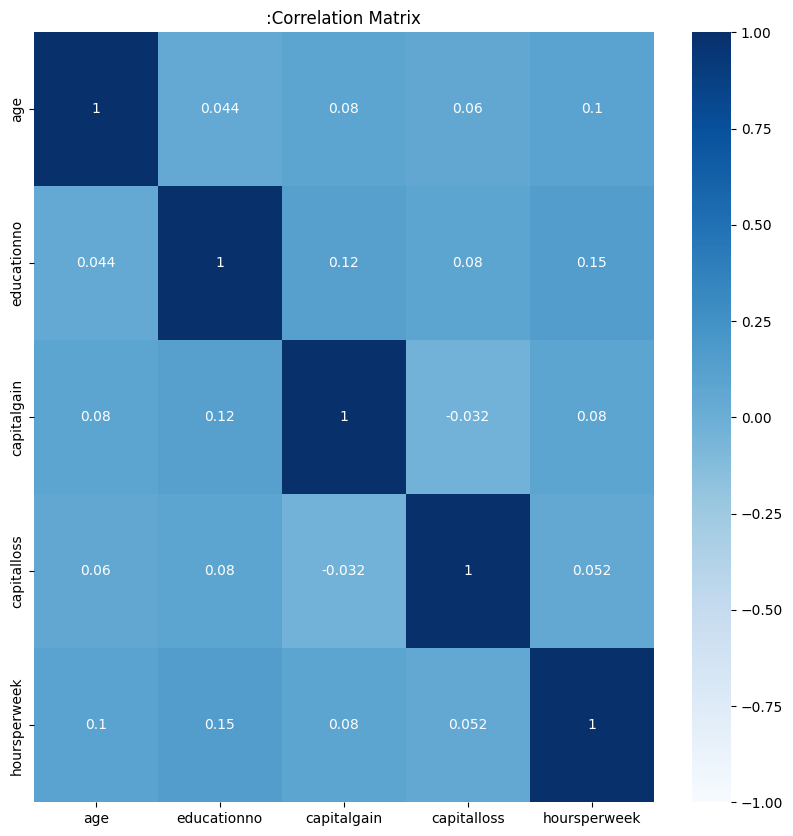

In [4]:
# Finding the Correlation between Numerical column
plt.figure(figsize=(10,10))
plt.title(":Correlation Matrix")
sns.heatmap(df_train[['age','educationno','capitalgain','capitalloss','hoursperweek']].corr(),annot=True,vmax=1,vmin=-1,cmap="Blues")
plt.show()


In [5]:
# Checking the Data Type of the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
# Checking the Null Values

df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

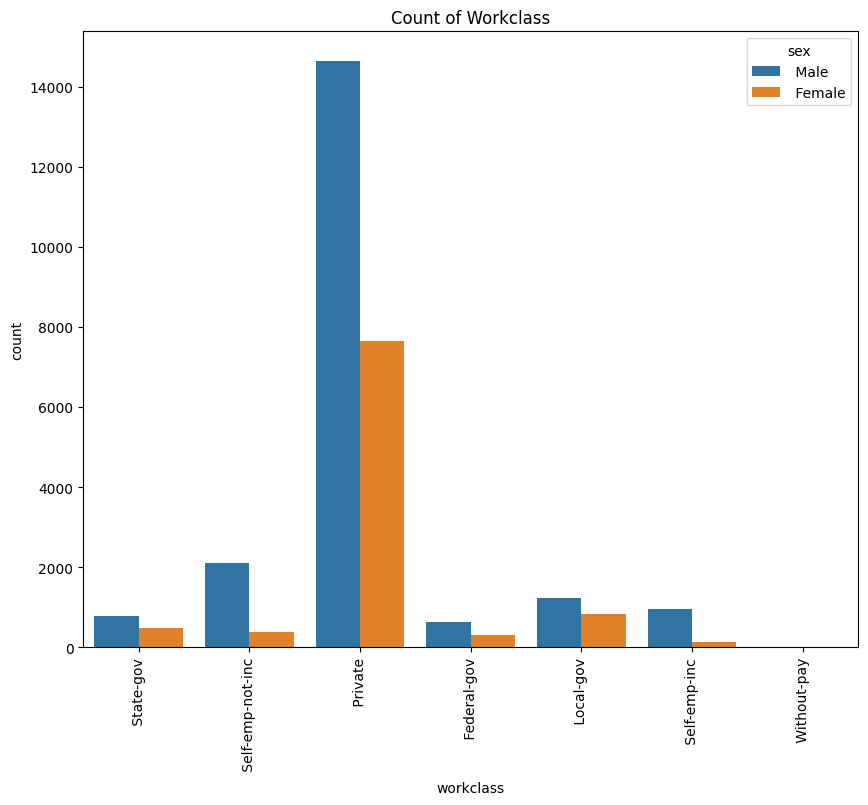

In [7]:
# Perfomring EDA Technique
# Checking Count of Each Column value

# Count of Employees workclass on the basis of Male and Female

plt.figure(figsize=(10,8))
plt.xlabel("WrokClasses")
plt.ylabel("Count_of_Workclass")
plt.title("Count of Workclass")
plt.xticks(rotation=90)
sns.countplot(x = df_train['workclass'],data=df_train,hue=df_train['sex'])
plt.show()


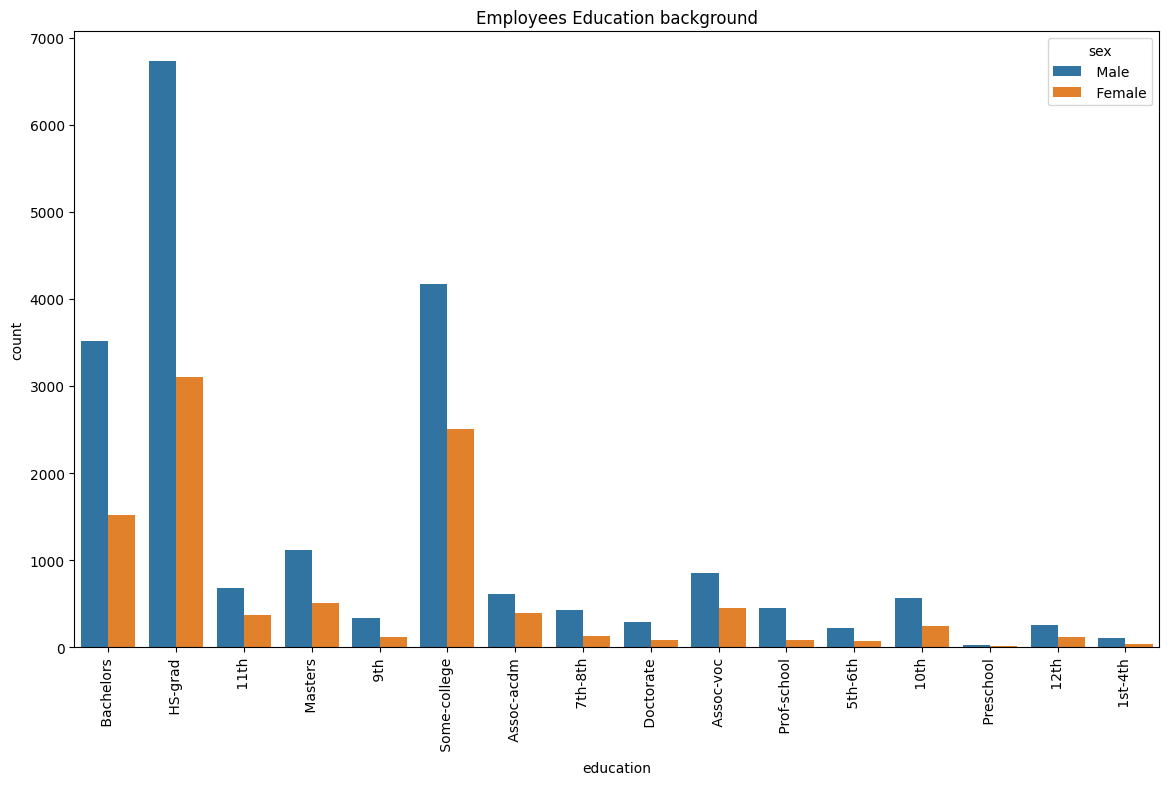

In [8]:
# Count of Employees Education background on the basis of Gender

plt.figure(figsize=(14,8))
plt.xlabel("Education Titles")
plt.ylabel("Frequency_of Employees")
plt.title("Employees Education background")
plt.xticks(rotation=90)
sns.countplot(x = df_train['education'],data=df_train,hue=df_train['sex'])
plt.show()

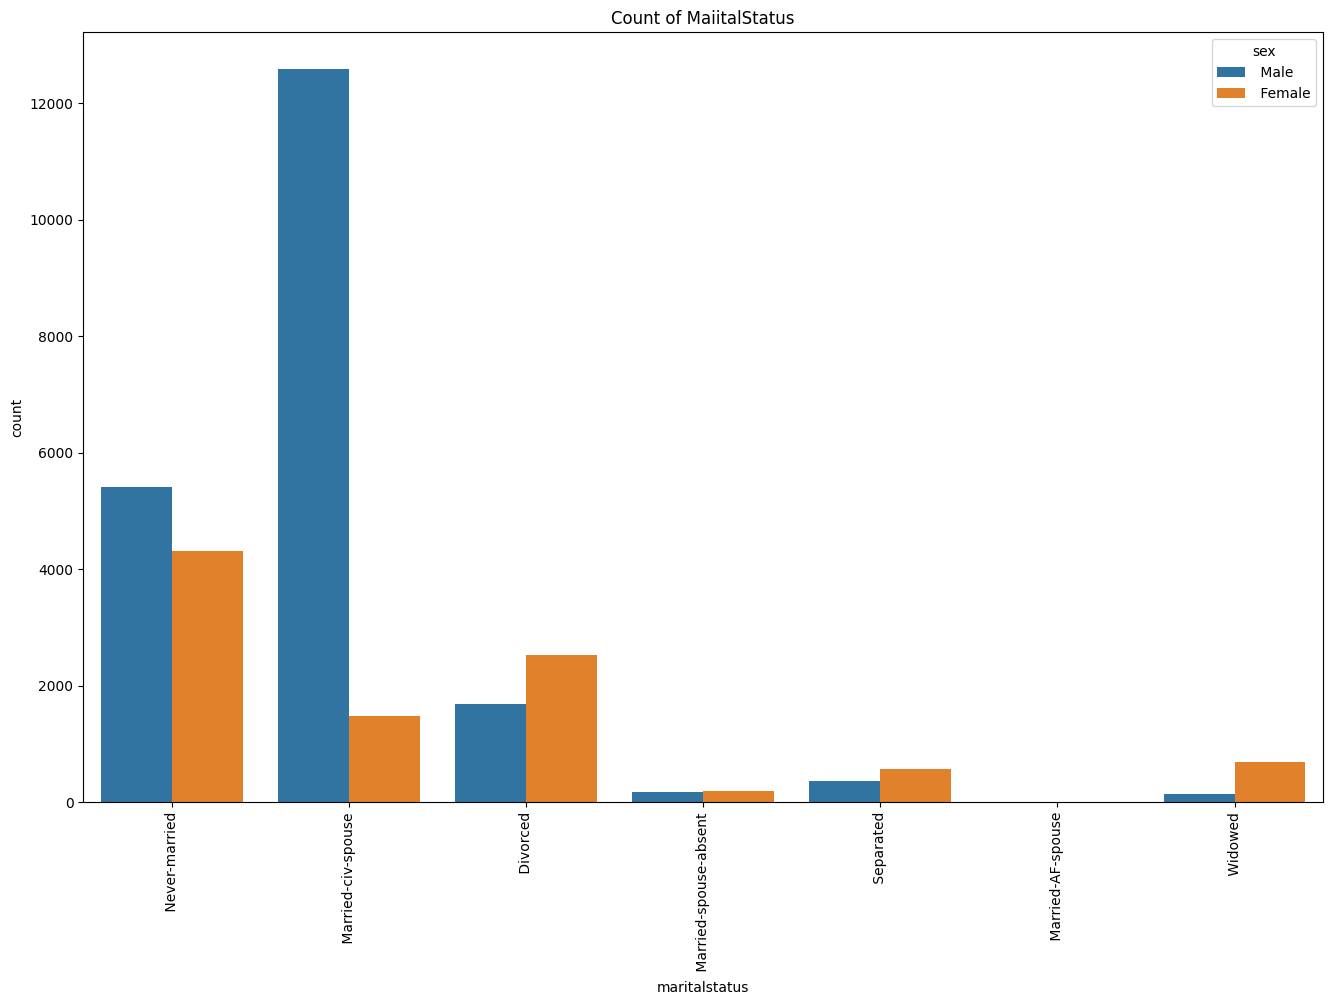

In [9]:
# Count of Employees  maritalStatus on basis of Male and Female

plt.figure(figsize=(16,10))
plt.xlabel("MaritalStatus")
plt.ylabel("Number_of_counts")
plt.title("Count of MaiitalStatus")
plt.xticks(rotation=90)
sns.countplot(data = df_train,x = df_train['maritalstatus'],hue=df_train['sex'])
plt.show()

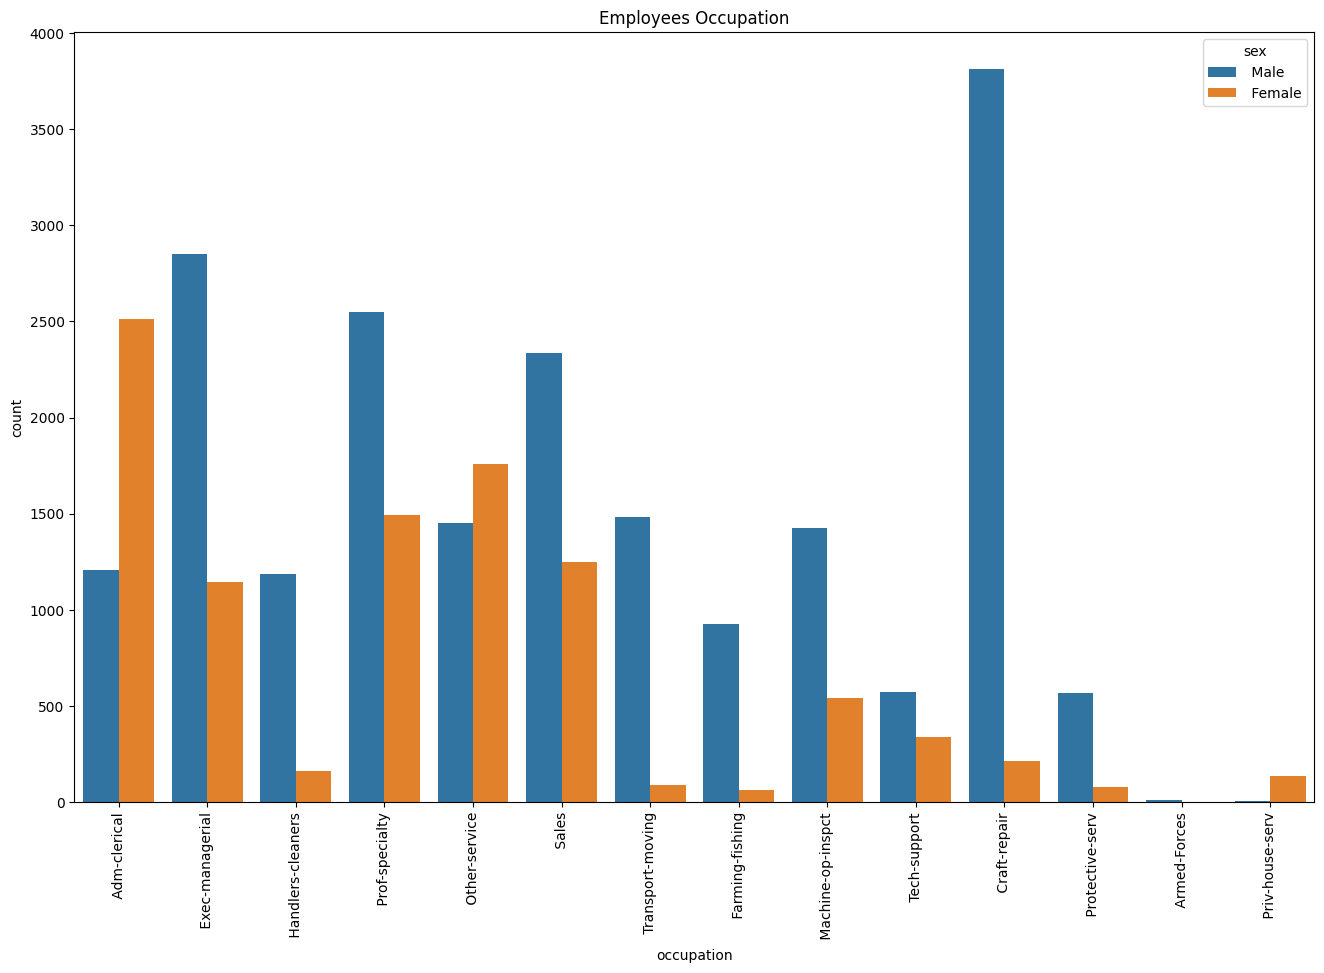

In [10]:
# Count of Employees Occupation on the basis of Gender

plt.figure(figsize=(16,10))
plt.xlabel("Type of Occupation")
plt.ylabel("Occupation Frequency Count")
plt.title("Employees Occupation")
plt.xticks(rotation=90)
sns.countplot(data = df_train,x = df_train['occupation'],hue=df_train['sex'])
plt.show()


In [11]:
# Preprocesing the Data
# Encoding the value of the columns from 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [12]:
"""
Encoding The Categorical Values of the columns to Numerical
OneHotEncoder is used to encode the Nominal Data. the data which can be organised but cannot be ranked in Sequence
So In our dataset we have only one Nominal Datatype column is Sex column.
OrdinalEncoder is used to encod the Ordinal Data. the Which can be Organised and can be ranked on the basis of there quantity
All the Categorical column in our dataset are OridnalData except Sex Column
Label Encoder is used Encode the Label or the Output column from categorical to Numerical

"""

'\nEncoding The Categorical Values of the columns to Numerical\nOneHotEncoder is used to encode the Nominal Data. the data which can be organised but cannot be ranked in Sequence\nSo In our dataset we have only one Nominal Datatype column is Sex column.\nOrdinalEncoder is used to encod the Ordinal Data. the Which can be Organised and can be ranked on the basis of there quantity\nAll the Categorical column in our dataset are OridnalData except Sex Column\nLabel Encoder is used Encode the Label or the Output column from categorical to Numerical\n\n'

In [13]:
# Encoding Sex column using OneHotEncoder

encod = OneHotEncoder(sparse_output=False,handle_unknown="ignore",drop='first')
df_train['sex'] = encod.fit_transform(df_train[['sex']])
df_train['sex'].value_counts()

sex
1.0    20380
0.0     9781
Name: count, dtype: int64

In [14]:
# Encoding workclass column using OrdinalEncoder

ord_encode = OrdinalEncoder(categories=[[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay']])

df_train['workclass'] = ord_encode.fit_transform(df_train[['workclass']])
df_train['workclass'].value_counts()

workclass
2.0    22285
1.0     2499
4.0     2067
0.0     1279
5.0     1074
3.0      943
6.0       14
Name: count, dtype: int64

In [15]:
# Encoding the output Column using Label Encoder

lab_encoder = LabelEncoder()
df_train['Salary'] = lab_encoder.fit_transform(df_train['Salary'])
df_train['Salary'].value_counts()

Salary
0    22653
1     7508
Name: count, dtype: int64

In [16]:
# Encoding relarionship and maritalstatus

rel_encode = OrdinalEncoder(categories=[[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative']])

df_train['relationship'] = rel_encode.fit_transform(df_train[['relationship']])

marital_encode = OrdinalEncoder(categories=[[' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed']])
df_train['maritalstatus'] = marital_encode.fit_transform(df_train[['maritalstatus']])

In [17]:
# Encoding Educationa and Occupation column

edu_encode = OrdinalEncoder(categories=[[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th']])
df_train['education'] = edu_encode.fit_transform(df_train[['education']])

occu_encoder = OrdinalEncoder(categories=[[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']])
df_train['occupation'] = occu_encoder.fit_transform(df_train[['occupation']])

# Map function is used to map the data through custom values
# like i have assign canada as 40 which is at the 9th postion

df_train['native'] = df_train['native'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,
       ' Puerto-Rico':6, ' Honduras':7, ' England':8, ' Canada':40, ' Germany':9,
       ' Iran':10, ' Philippines':11, ' Poland':12, ' Columbia':13, ' Cambodia':14,
       ' Thailand':15, ' Ecuador':16, ' Laos':17, ' Taiwan':18, ' Haiti':19, ' Portugal':20,
       ' Dominican-Republic':21, ' El-Salvador':22, ' France':23, ' Guatemala':24,
       ' Italy':25, ' China':26, ' South':27, ' Japan':28, ' Yugoslavia':29, ' Peru':30,
       ' Outlying-US(Guam-USVI-etc)':31, ' Scotland':32, ' Trinadad&Tobago':33,
       ' Greece':34, ' Nicaragua':35, ' Vietnam':36, ' Hong':37, ' Ireland':38,
       ' Hungary':39})



In [18]:
# Encoding of race column

col_ord = OrdinalEncoder(categories=[[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other']])

df_train['race'] = col_ord.fit_transform(df_train[['race']])

In [19]:
# Splitting the into X_train and Y_train where X_train is independents varables and y_train is dependent variable
X_train = df_train.iloc[:,:-1]
X_train
y_trian = df_train.iloc[:,-1]
y_trian

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [20]:
# importing Guassian Naive bayes Algorithm and Fitting the data 
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_trian)

GaussianNB()

In [21]:
# Score Checking Library for the model 
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
# Accuracy Score of Training Data 

accuracy_score(y_trian,model.predict(X_train)) * 100

79.92772122940221

In [23]:

# Confusion Matrix of Training Data set

confusion_matrix(y_trian,model.predict(X_train))

array([[21353,  1300],
       [ 4754,  2754]], dtype=int64)

<Axes: >

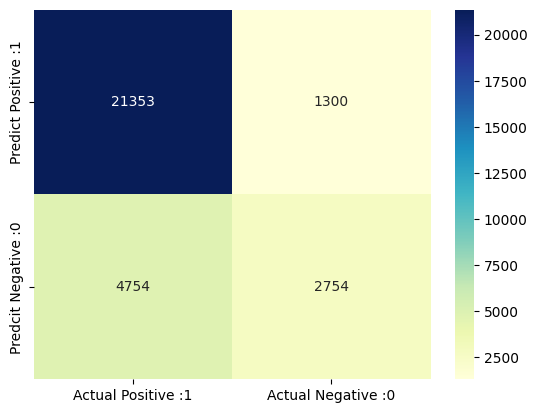

In [24]:
# Graph of Confusion matrix of Training Data

cm_matrix_data = pd.DataFrame(data = confusion_matrix(y_trian,model.predict(X_train)), columns=['Actual Positive :1','Actual Negative :0'],index=['Predict Positive :1','Predcit Negative :0'])
sns.heatmap(cm_matrix_data,annot=True,fmt='d',cmap='YlGnBu')

# Working on Testing Dataset

In [25]:
df_test = pd.read_csv("D:/Desktop/Assignments/Assignemnt12/SalaryData_Test(1).csv")
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [26]:
encod = OneHotEncoder(sparse_output=False,handle_unknown="ignore",drop='first')
df_test['sex'] = encod.fit_transform(df_test[['sex']])
df_test['sex'].value_counts()

sex
1.0    10147
0.0     4913
Name: count, dtype: int64

In [27]:
rel_encode = OrdinalEncoder(categories=[[' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative']])

df_test['relationship'] = rel_encode.fit_transform(df_test[['relationship']])

marital_encode = OrdinalEncoder(categories=[[' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed']])
df_test['maritalstatus'] = marital_encode.fit_transform(df_test[['maritalstatus']])
df_test['relationship'].value_counts()

relationship
1.0    6203
0.0    3976
3.0    2160
4.0    1576
2.0     685
5.0     460
Name: count, dtype: int64

In [28]:
edu_encode = OrdinalEncoder(categories=[[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th']])
df_test['education'] = edu_encode.fit_transform(df_test[['education']])

occu_encoder = OrdinalEncoder(categories=[[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']])
df_test['occupation'] = occu_encoder.fit_transform(df_test[['occupation']])

df_test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,2.0,7,0.0,8.0,3.0,Black,1.0,0,0,40,United-States,<=50K
1,38,Private,1.0,9,1.0,7.0,1.0,White,1.0,0,0,50,United-States,<=50K
2,28,Local-gov,6.0,12,1.0,11.0,1.0,White,1.0,0,0,40,United-States,>50K
3,44,Private,5.0,10,1.0,8.0,1.0,Black,1.0,7688,0,40,United-States,>50K
4,34,Private,12.0,6,0.0,4.0,0.0,White,1.0,0,0,30,United-States,<=50K


In [29]:
ord_encode = OrdinalEncoder(categories=[[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay']])

df_test['workclass'] = ord_encode.fit_transform(df_test[['workclass']])
df_test['workclass'].value_counts()

workclass
2.0    11021
1.0     1297
4.0     1033
0.0      667
5.0      572
3.0      463
6.0        7
Name: count, dtype: int64

In [30]:
lab_encoder = LabelEncoder()
df_test['Salary'] = lab_encoder.fit_transform(df_test['Salary'])
df_test['Salary'].value_counts()

Salary
0    11360
1     3700
Name: count, dtype: int64

In [31]:
df_test['native'] = df_test['native'].map({' United-States':1, ' Cuba':2, ' Jamaica':3, ' India':4, ' Mexico':5,
       ' Puerto-Rico':6, ' Honduras':7, ' England':8, ' Canada':40, ' Germany':9,
       ' Iran':10, ' Philippines':11, ' Poland':12, ' Columbia':13, ' Cambodia':14,
       ' Thailand':15, ' Ecuador':16, ' Laos':17, ' Taiwan':18, ' Haiti':19, ' Portugal':20,
       ' Dominican-Republic':21, ' El-Salvador':22, ' France':23, ' Guatemala':24,
       ' Italy':25, ' China':26, ' South':27, ' Japan':28, ' Yugoslavia':29, ' Peru':30,
       ' Outlying-US(Guam-USVI-etc)':31, ' Scotland':32, ' Trinadad&Tobago':33,
       ' Greece':34, ' Nicaragua':35, ' Vietnam':36, ' Hong':37, ' Ireland':38,
       ' Hungary':39})

In [32]:
col_ord = OrdinalEncoder(categories=[[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other']])

df_test['race'] = col_ord.fit_transform(df_test[['race']])
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,2.0,7,0.0,8.0,3.0,1.0,1.0,0,0,40,1,0
1,38,2.0,1.0,9,1.0,7.0,1.0,0.0,1.0,0,0,50,1,0
2,28,4.0,6.0,12,1.0,11.0,1.0,0.0,1.0,0,0,40,1,1
3,44,2.0,5.0,10,1.0,8.0,1.0,1.0,1.0,7688,0,40,1,1
4,34,2.0,12.0,6,0.0,4.0,0.0,0.0,1.0,0,0,30,1,0


In [33]:
# Dividing the Data into X_test and Y_test

X_test = df_test.iloc[:,:-1]
X_test
y_test = df_test.iloc[:,-1]
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [34]:
# testing Accuracy Score of the model
accuracy_score(y_test,model.predict(X_test))*100

80.0132802124834

In [35]:
# Confusion Matrix of the actual and Predicted Values
confusion_matrix(y_test,model.predict(X_test))

array([[10689,   671],
       [ 2339,  1361]], dtype=int64)

<Axes: >

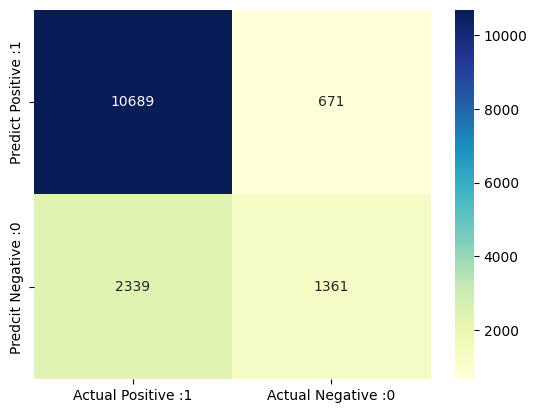

In [36]:
# Graph of Confuion Matrix

cm_matrix_data = pd.DataFrame(data = confusion_matrix(y_test,model.predict(X_test)), columns=['Actual Positive :1','Actual Negative :0'],index=['Predict Positive :1','Predcit Negative :0'])
sns.heatmap(cm_matrix_data,annot=True,fmt='d',cmap='YlGnBu')

In [37]:
cm_matrix_data

,Actual Positive :1,Actual Negative :0
Predict Positive :1,10689,671
Predcit Negative :0,2339,1361


# Thank you